In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np

%matplotlib inline

In [2]:
# Vwcap for 'glacier' HRU - stops breaking when bigger or eq. then 0.25
# snowacc - total snow and ice accumulation 
# - varya 

## Jacob's model

In [ ]:
"""
Created on Thu Feb  3 16:56:57 2022

@author: hirschbe
"""


# only 2 HRUs

# from SedCas_glacier import SedCas
from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [ ]:
hydro_out = pd.read_csv('jacob_model/Hydro.out')#.set_index('D')

hydro_out

### balance check 

In [ ]:
hydro_out.Q.sum() - hydro_out.Pr.sum() 

In [ ]:
hydro_out.snowacc.sum() # very small number 

In [ ]:
hydro_out.AET.sum()

In [ ]:
# Change in storage: 
ds = hydro_out.Vw.values[-1] - hydro_out.Vw.values[0] + hydro_out.snow.values[-1] - hydro_out.snow.values[0]

print(ds)

In [ ]:
# total balance: 
# Pr + gmelt – AET – Q – ds 

b = hydro_out.Pr.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds

print(round(b, 10))

In [ ]:
hydro_out.Vw.values[-1] - hydro_out.Vw.values[0]

In [ ]:
hydro_out.snow.values[-1] - hydro_out.snow.values[0]

## glacier model 

s variable                      depth  ddepth  sacc  smelt  albedo
D                                                      
1999-10-01 00:00:00    0.0     0.0   0.0  0.408    0.15
1999-10-01 01:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 02:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 03:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 04:00:00    0.0     0.0   0.0  0.000    0.15
...                    ...     ...   ...    ...     ...
2017-10-31 19:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 20:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 21:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 22:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 23:00:00    0.0     0.0   0.0  0.000    0.15

[158544 rows x 5 columns]
...
...
...
s variable                      depth  ddepth  sacc  smelt  albedo
D                                                      
1999-10-01 00:00:00    0.0     0.0   0.0  0.408    0.25
1999-10-01 01:00:00    0.0     0.0   0.0  0

  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/varyabazilova/Desktop/sedcas/varya_project/wsl_stay_10oct2022/glaciers_2/modules.py:976: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcond['cond2'][1:] = dfcond.cond1[:-1]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


hello world


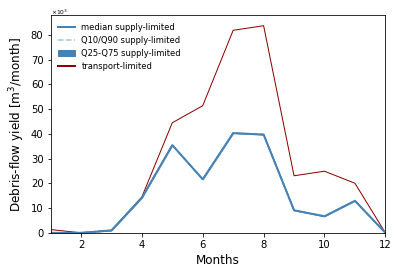

In [3]:
# 3 HRUs, but glaciers are 0 

from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [4]:
hydro_out = pd.read_csv('glacier_model/Hydrotest2.out')#.set_index('D')

hydro_out

,D,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt,snow_melt
0,1999-10-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,5.6,0.0408,-4.080000e-02
1,1999-10-01 01:00:00,0.040000,0.0,0.040000,0.000000,0.0,-0.0400,0.0,0.0,0.0,5.5,0.0400,-5.820788e-13
2,1999-10-01 02:00:00,0.041600,0.0,0.041600,0.000000,0.0,-0.0416,0.0,0.0,0.0,5.7,0.0416,-2.561173e-13
3,1999-10-01 03:00:00,0.090303,0.0,0.090303,0.351297,0.0,-0.0416,0.0,0.0,0.4,5.7,0.0416,-2.561173e-13
4,1999-10-01 04:00:00,0.062108,0.0,0.062108,0.430789,0.0,-0.0416,0.0,0.0,0.1,5.7,0.0416,-2.561173e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158539,2017-10-31 19:00:00,0.009626,0.0,0.009626,0.599051,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,1.164208e-14
158540,2017-10-31 20:00:00,0.009617,0.0,0.009617,0.596634,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,1.164208e-14
158541,2017-10-31 21:00:00,0.009608,0.0,0.009608,0.594226,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,1.164208e-14
158542,2017-10-31 22:00:00,0.009599,0.0,0.009599,0.591827,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,1.164208e-14


In [6]:
# hydro_out.snow_melt[:1000].plot()

In [7]:
# Change in storage: 
ds = hydro_out.Vw.values[-1] - hydro_out.Vw.values[0] + hydro_out.snow.values[-1] - hydro_out.snow.values[0]

print(ds)

0.5894364347366297


In [8]:
# total balance: 
# Pr + gmelt – AET – Q – ds 

b = hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds

print(round(b, 10))

540.9508


In [9]:
hydro_out.Q.sum()

17753.03727491374

In [10]:
hydro_out.AET.sum() 

4599.33208865152

In [12]:
hydro_out['Qgl'] = hydro_out.Q + hydro_out.glacier_melt

In [13]:
hydro_out.Qgl.values.sum()

25148.946874913734

In [14]:
hydro_out.Pr.sum() - hydro_out.AET.sum() - hydro_out.Qgl.sum() - ds


-14250.868399999988

In [ ]:



from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [ ]:
hydro_out1 = pd.read_csv('glacier_model/01gl_Hydro.out')#.set_index('D')

hydro_out1

In [ ]:
# Change in storage: 
ds1 = hydro_out1.Vw.values[-1] - hydro_out1.Vw.values[0] + hydro_out1.snow.values[-1] - hydro_out1.snow.values[0]

print(ds1)

In [ ]:
# total balance: 
# Pr + gmelt – AET – Q – ds 

# b = hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds

b1 = hydro_out1.Pr.sum() + hydro_out1.glacier_melt.sum() - hydro_out1.AET.sum() - hydro_out1.Q.sum() - ds1

print(round(b1, 10))

In [ ]:
hydro_out1.glacier_melt.sum()

In [ ]:
hydro_out1.Q.sum()

In [ ]:
hydro_out1.AET.sum()

In [ ]:
## only 1 HRU - glacier, rest - 0


from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [ ]:
hydro_out2 = pd.read_csv('glacier_model/Hydrotest.out')#.set_index('D')

hydro_out2

In [ ]:
# Change in storage: 
ds2 = hydro_out2.Vw.values[-1] - hydro_out2.Vw.values[0] + hydro_out2.snow.values[-1] - hydro_out2.snow.values[0]

print(ds2)

In [ ]:
hydro_out2['Qgl'] = hydro_out2.Q + hydro_out2.glacier_melt

In [ ]:
# total balance:
# Pr + gmelt – AET – Q – ds

# b = hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds
# b2 = hydro_out2.Pr.sum() + hydro_out2.glacier_melt.sum() - hydro_out2.AET.sum() - hydro_out2.Q.sum() - ds2
ds = hydro_out.Vw.values[-1] - hydro_out.Vw.values[0] + hydro_out.snow.values[-1] - hydro_out.snow.values[0]
balance = hydro_out.Pr.sum() - hydro_out.AET.sum() - hydro_out.Qgl.sum() - ds


print(round(b2, 10))

In [ ]:
hydro_out2.snow_melt.sum()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

snowacc1 = hydro_out2.snowacc * -1
melt = hydro_out2.glacier_melt + hydro_out2.snow_melt

melt.plot(label = 'melt')
snowacc1.plot(label = 'snowacc')
hydro_out2.glacier_melt.plot(label = 'gl melt')
hydro_out2.snow_melt.plot(label = 'snow melt')

plt.legend()

In [ ]:
hydro_out2['allmelt'] = hydro_out2.snow_melt + hydro_out2.glacier_melt
hydro_out2['snowacc_melt']  = np.where(hydro_out2['snowacc'] < 0, -hydro_out2['snowacc'], 0)


In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

hydro_out2.allmelt.plot(label = 'allmelt')
# hydro_out2.snow_melt.plot(label = 'snow melt')
# hydro_out2.glacier_melt.plot(label = 'glacier_melt')
# hydro_out2.snowacc.plot(label = 'snowacc')
hydro_out2.snowacc_melt.plot(label = 'snowacc_melt')
snowacc1 = hydro_out2.snowacc * -1
# snowacc1.plot(label = 'snowacc1')
plt.legend()




In [ ]:
hydro_out2

NameError: name 'hydro_out2' is not defined

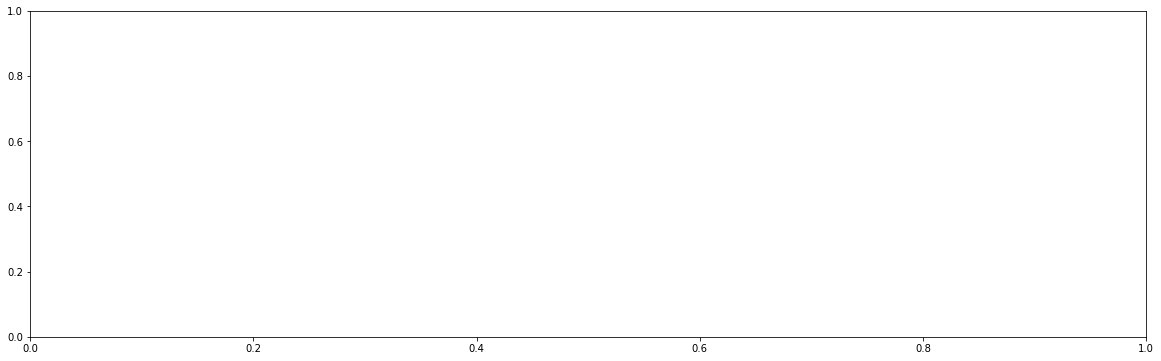

In [20]:
fig, ax = plt.subplots(figsize = (20, 6))

hydro_out2 = hydro_out2[:2000]
gl = hydro_out2.glacier_melt * -1

hydro_out2.snow_melt.plot(label='snow melt')
hydro_out2.glacier_melt.plot(label='glacier melt')

hydro_out2.snowacc.plot(label='snowacc')


plt.legend()
plt.legend(fontsize = 20)


In [ ]:
# 

In [ ]:
df = hydro_out2
# df['snow_melt'] = np.where(df['sacc'] < 0, df['sacc']* -1, 0)
df = df.set_index('D')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

df2 = df[:5000]

df2.snow_melt.plot(label = 'snow melt', alpha = 0.7)
df2.glacier_melt.plot(label = 'glacier melt', alpha = 0.7)
df2.snowacc.plot(label = 'snowacc', alpha = 0.7)

plt.legend(fontsize = 20)
# plt.savefig('melt_subset_first10kvalues.png')

s variable                      depth  ddepth  sacc  smelt  albedo
D                                                      
1999-10-01 00:00:00    0.0     0.0   0.0  0.408    0.15
1999-10-01 01:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 02:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 03:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 04:00:00    0.0     0.0   0.0  0.000    0.15
...                    ...     ...   ...    ...     ...
2017-10-31 19:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 20:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 21:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 22:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 23:00:00    0.0     0.0   0.0  0.000    0.15

[158544 rows x 5 columns]
...
...
...
s variable                      depth  ddepth  sacc  smelt  albedo
D                                                      
1999-10-01 00:00:00    0.0     0.0   0.0  0.408    0.25
1999-10-01 01:00:00    0.0     0.0   0.0  0

  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/varyabazilova/Desktop/sedcas/varya_project/wsl_stay_10oct2022/glaciers_2/modules.py:976: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcond['cond2'][1:] = dfcond.cond1[:-1]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]


hello world


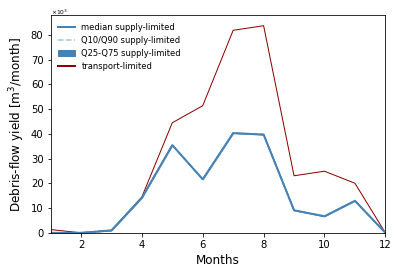

In [1]:


from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [4]:
hydro_out = pd.read_csv('Hydro.out')#.set_index('D')


In [16]:
hydro_out['Qgl'] = hydro_out.Q + hydro_out.glacier_melt
# b2 = hydro_out2.Pr.sum() + hydro_out2.glacier_melt.sum() - hydro_out2.AET.sum() - hydro_out2.Q.sum() - ds2
ds = hydro_out.Vw.values[-1] - hydro_out.Vw.values[0] + hydro_out.snow.values[-1] - hydro_out.snow.values[0]


hydro_out.Pr.sum() - hydro_out.AET.sum() - hydro_out.Qgl.sum() - ds


-14250.868399999988

In [18]:
hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds


540.9508000000062

In [19]:
ds

0.5894364347366297